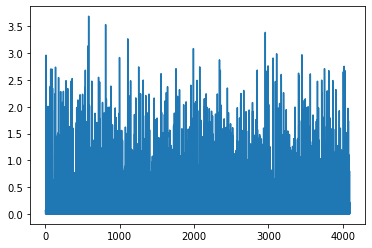

In [9]:
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

img_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/D1_a.png'
img = image.load_img(img_path, target_size=(224, 224))
model = vgg16.VGG16(weights='imagenet', include_top=True)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)

model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer('fc2').output)

fc2_features = model_extractfeatures.predict(x)
fc2_features = fc2_features.reshape((4096,1))
np.savetxt('fc2.txt',fc2_features)

plt.plot(fc2_features)
plt.show()